In [1]:
using SpecialFunctions
Φ(z) = erfc(-z/sqrt(2))/2;

In [2]:
g(μc,aR,m) = μc*aR - m;
Keff(K,a,b,μc,μX,γ,aλ) = K - (a*μc+b*μX)*aλ/γ;
σg(σc,qR,σm) = sqrt(σc^2*qR + σm^2);
σKeff(σK,a,b,σc,σX,γ,qλ) = sqrt(σK^2 + (a^2 * σc^2 + b^2 * σX^2)*qλ/γ);
ΔKeff(K,σK,a,b,μc,σc,μX,σX,γ,aλ,qλ) = Keff(K,a,b,μc,μX,γ,aλ)/σKeff(σK,a,b,σc,σX,γ,qλ);
Δg(μc,σc,m,σm,aR,qR) = g(μc,aR,m)/σg(σc,qR,σm);

In [3]:
W1(x) = exp(-x^2/2)/sqrt(2π) + x*Φ(x);
W2(x) = x*exp(-x^2/2)/sqrt(2π) + (1+x^2)*Φ(x);

In [4]:
eqχ(χ,ν,ϕR,σc,γ,a) = χ - (
    ϕR/(1-a*σc^2*ν/γ)
);
eqν(ν,χ,ϕλ,σc,a) = ν - (
    -ϕλ / (a*σc^2*χ)
);
eqϕR(ϕR,K,σK,a,b,μc,σc,μX,σX,γ,aλ,qλ) = ϕR - (
    Φ(ΔKeff(K,σK,a,b,μc,σc,μX,σX,γ,aλ,qλ))
);
eqϕλ(ϕλ,μc,σc,m,σm,aR,qR) = ϕλ - (
    Φ(Δg(μc,σc,m,σm,aR,qR))
);
eqλ(aλ,χ,ν,a,μc,σc,m,σm,aR,qR) = aλ - (
    σg(σc,qR,σm)*(a*σc^2*χ)^(-1) * W1(Δg(μc,σc,m,σm,aR,qR))
);
eqR(aR,ν,K,σK,a,b,μc,σc,μX,σX,γ,aλ,qλ) = aR - (
    σKeff(σK,a,b,σc,σX,γ,qλ)*(1-a*σc^2*ν/γ)^(-1)*W1(ΔKeff(K,σK,a,b,μc,σc,μX,σX,γ,aλ,qλ))
);
eqqλ(qλ,χ,ν,a,μc,σc,m,σm,aR,qR) = qλ - (
    σg(σc,qR,σm)^2*(a*σc^2*χ)^(-2) * W2(Δg(μc,σc,m,σm,aR,qR))
);
eqqR(qR,ν,K,σK,a,b,μc,σc,μX,σX,γ,aλ,qλ) = qR - (
    σKeff(σK,a,b,σc,σX,γ,qλ)^2*(1-a*σc^2*ν/γ)^(-2)*W2(ΔKeff(K,σK,a,b,μc,σc,μX,σX,γ,aλ,qλ))
);

In [5]:
a(ρ,σe,σc) = ρ*σe/σc;
# b = 1
μX(ρ,μe,μc,σe,σc) = μe - (σe/σc)*ρ*μc;
σX(σe,ρ) = σe*sqrt(1-ρ^2);

In [6]:
lsqwOriginalParams(aλ,aR,qλ,qR,χ,ν,ϕR,ϕλ,K,σK,a,b,μc,σc,μX,σX,m,σm,γ) = 
    eqχ(χ,ν,ϕR,σc,γ,a)^2 + eqν(ν,χ,ϕλ,σc,a)^2 + eqϕR(ϕR,K,σK,a,b,μc,σc,μX,σX,γ,aλ,qλ)^2 + eqϕλ(ϕλ,μc,σc,m,σm,aR,qR)^2 + eqλ(aλ,χ,ν,a,μc,σc,m,σm,aR,qR)^2 + eqR(aR,ν,K,σK,a,b,μc,σc,μX,σX,γ,aλ,qλ)^2 + eqqλ(qλ,χ,ν,a,μc,σc,m,σm,aR,qR)^2+ eqqR(qR,ν,K,σK,a,b,μc,σc,μX,σX,γ,aλ,qλ)^2;

In [7]:
lsqwNewParams(aλ,aR,qλ,qR,χ,ν,ϕR,ϕλ,K,σK,ρ,μc,σc,μe,σe,m,σm,γ) = lsqwOriginalParams(aλ,aR,qλ,qR,χ,ν,ϕR,ϕλ,K,σK,a(ρ,σe,σc),1,μc,σc,μX(ρ,μe,μc,σe,σc),σX(σe,ρ),m,σm,γ)

lsqwNewParams (generic function with 1 method)

In [8]:
lsq(K,σK,ρ,μc,σc,μe,σe,m,σm,γ) = (aλ,aR,qλ,qR,χ,ν,ϕR,ϕλ) -> lsqwNewParams(aλ,aR,qλ,qR,χ,ν,ϕR,ϕλ,K,σK,ρ,μc,σc,μe,σe,m,σm,γ)

lsq (generic function with 1 method)

In [9]:
using Optimization

In [11]:
using OptimizationBBO
using OptimizationOptimJL, ForwardDiff
using OptimizationOptimisers#, Zygote
# using OptimizationEvolutionary

In [12]:
u0 = 0.5rand(8);
M = 300;
S = 300;
# (K,σK,ρ,μc,σc,μe,σe,m,σm,γ)
ρ = 0.05
p = [1e0,1e-1,ρ,1e0M,2e-1sqrt(M),1e0M,2e-1sqrt(M),1e0,1e-1,M/S];
# p = [1.0,0.1,1.0,0.0,1.0,0.1,1.0,0.1,1.0,0.01,1];
lsqq(u,p) = lsq(p...)(u...);

In [13]:
optf = OptimizationFunction(lsqq)
# prob = OptimizationProblem(optf,u0,p);
# prob = OptimizationProblem(optf,u0,p,lb=vcat(-1e2ones(2),zeros(2),-1e2ones(2),zeros(2)),ub=vcat(1e2ones(2),1e2ones(2),1e2ones(2),ones(2)));
prob = OptimizationProblem(optf,u0,p,lb=vcat(-1e8ones(2),zeros(2),-1e8ones(2),zeros(2)),ub=vcat(1e8ones(2),1e8ones(2),1e8ones(2),ones(2)));
# prob = OptimizationProblem(optf,u0,p);
# sol = solve(prob,Adam(1.0),maxiters=1000)#,abstol=1e-14,local_abstol=1e-14,local_reltol=1e-14)
sol = solve(prob,BBO_adaptive_de_rand_1_bin_radiuslimited(), maxiters=100_000)#,abstol=1e-14,local_abstol=1e-14,local_reltol=1e-14)
# (aλ,aR,qλ,qR,χ,ν,ϕR,ϕλ)

u: 8-element Vector{Float64}:
  0.013538709052545443
  0.003627101949061235
  0.08575217755747902
  8.25449085091079e-8
  0.019341747146617388
 -0.38829508318356126
  0.021234320358217554
  0.0030049314340271265

In [14]:
lsqq(sol,p)

1.487070211247439e-5

In [107]:
function something(ρ,p)
    # u0 = 0.5ones(8);
    u0 = 0.02rand(8);
    M = 300;
    S = 300;
    # (K,σK,ρ,μc,σc,μe,σe,m,σm,γ)
    # p = [1e0,1e-1,ρ,1e0M,2e-1sqrt(M),1e0M,2e-1sqrt(M),1e0,1e-1,M/S];
    # p = [1e0,1e-1,sqrt(1-α^2),α,1e0*200,2e-1*sqrt(200),1e0*200,2e-1*sqrt(200),1e0,1e-1,1];
    optf = OptimizationFunction(lsqq)
    # optf = OptimizationFunction(lsqq, Optimization.AutoForwardDiff())#OptimizationFunction(lsqq, Optimization.AutoZygote())
    # prob = OptimizationProblem(optf,u0,p);
    # prob = OptimizationProblem(optf,u0,p,lb=vcat(zeros(4),-1e2ones(2),zeros(2)),ub=vcat(1e6ones(6),ones(2)));
    prob = OptimizationProblem(optf,u0,p,lb=vcat(-1e12ones(2),zeros(2),-1e12ones(2),zeros(2)),ub=vcat(1e12ones(2),1e12ones(2),1e12ones(2),ones(2)));
    # prob = OptimizationProblem(optf,u0,p,lb=vcat(-1e8ones(2),zeros(2),-1e8ones(2),zeros(2)),ub=vcat(1e8ones(2),1e8ones(2),1e8ones(2),ones(2)));
    sol = solve(prob,BBO_adaptive_de_rand_1_bin_radiuslimited(), maxiters=10_000_000,maxtime=6)#,abstol=1e-14,local_abstol=1e-14,local_reltol=1e-14)
    return sol
end

something (generic function with 1 method)

In [108]:
# ρs = 0.0025:0.005:0.2
# ρs = 0.005:0.005:0.4
# ρs = 0.005:0.0005:0.3
# ρs = 0.005:0.005:0.5
ρs = 0.01:0.01:1.0

0.01:0.01:1.0

In [109]:
using Plots, LaTeXStrings; theme(:dao)

In [110]:
# (K,σK,ρ,μc,σc,μe,σe,m,σm,γ)
M = 300;
S = 300;
pp(ρ) = [1e0,1e-1,ρ,1e0M,2e-1sqrt(M),1e0M,2e-1sqrt(M),1e0,1e-1,M/S];
# M = 200;
# S = 200;
# K = 1e0;
# σK = 1e-1;
# μc = 1e0M;
# σc = 2e-1sqrt(M);
# μe = 1e0M;
# σe = 2e-1sqrt(M);
# m = 1e0;
# σm = 1e-1;

somedat = (ρ->something(ρ,pp(ρ))).(ρs);

mew = [lsqq(somedat[i],(pp.(ρs))[i]) for i in eachindex(somedat)]

100-element Vector{Float64}:
 1.4752503565622862e-5
 1.378764116248206e-5
 1.2486047585856715e-5
 1.1081569115532525e-5
 9.751717206306983e-6
 8.573270615239685e-6
 7.559673754105553e-6
 6.697572621195872e-6
 9.288668379920788e-7
 6.352774447542805e-7
 3.834205557674424e-7
 1.9510867053003796e-7
 7.533285296279311e-8
 ⋮
 8.965789287309292e-35
 3.4971691620932317e-35
 2.71240178664458e-34
 2.1302896372776905e-35
 3.6840066423167417e-34
 5.623572321173516e-34
 2.6921245090928955e-34
 5.041702617516484e-34
 7.24574717846858e-35
 3.8412877864567638e-34
 7.769966231057472e-34
 2.420813066083419e-34

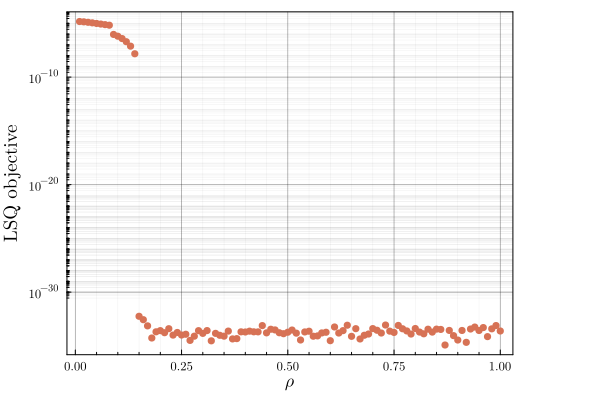

In [111]:
scatter((ρs),mew,label=:none,ylabel="LSQ objective",xlabel=L"\rho",yscale=:log10)

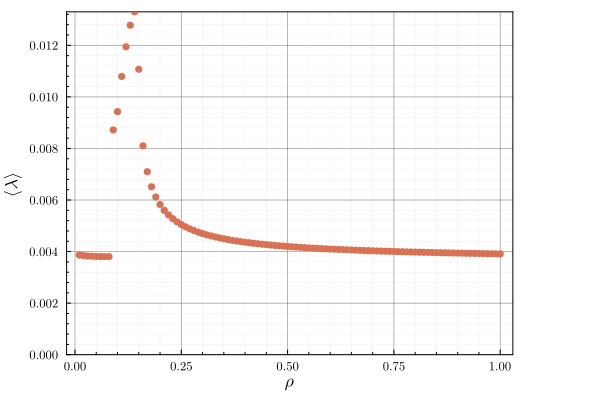

In [112]:
scatter(ρs,hcat(somedat...)[1,:],
ylim=(0,:auto),
label=:none,
xlabel=L"\rho",
ylabel=L"\langle\lambda\rangle"
)
# (aλ,aR,qλ,qR,χ,ν,ϕR,ϕλ)

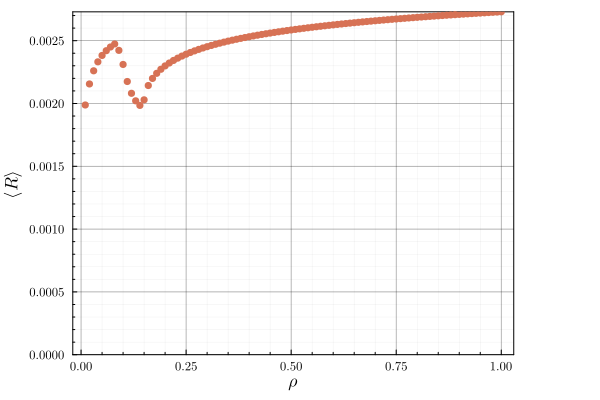

In [113]:
scatter(ρs,hcat(somedat...)[2,:],
ylim=(0,:auto),
label=:none,
xlabel=L"\rho",
ylabel=L"\langle R\rangle"
)
# (aλ,aR,qλ,qR,χ,ν,ϕR,ϕλ)

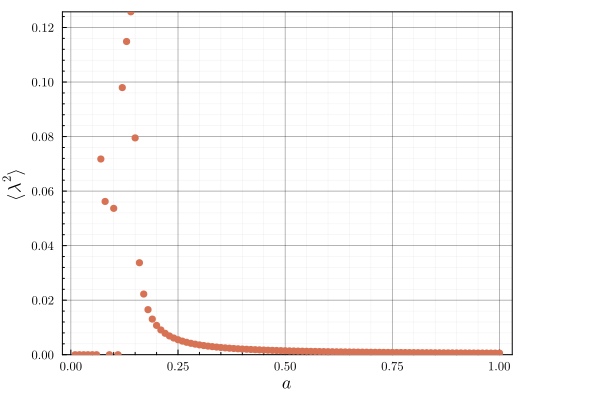

In [99]:
scatter(ρs,hcat(somedat...)[3,:],
ylim=(0,:auto),
label=:none,
xlabel=L"a",
ylabel=L"\langle \lambda^2\rangle"
)
# (aλ,aR,qλ,qR,χ,ν,ϕR,ϕλ)

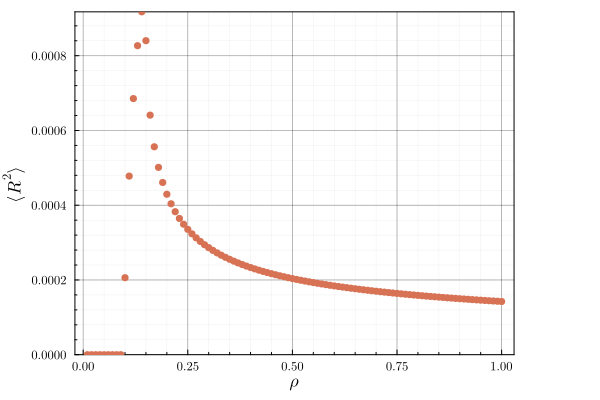

In [114]:
scatter(ρs,hcat(somedat...)[4,:],
ylim=(0,:auto),
label=:none,
xlabel=L"\rho",
ylabel=L"\langle R^2\rangle")


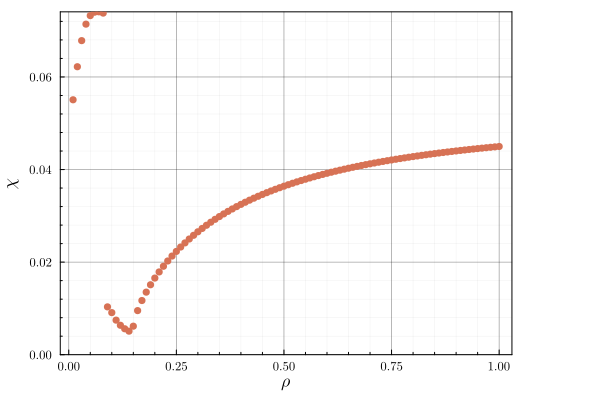

In [115]:
scatter(ρs,hcat(somedat...)[5,:],
ylim=(0,:auto),
label=:none,
xlabel=L"\rho",
ylabel=L"\chi")

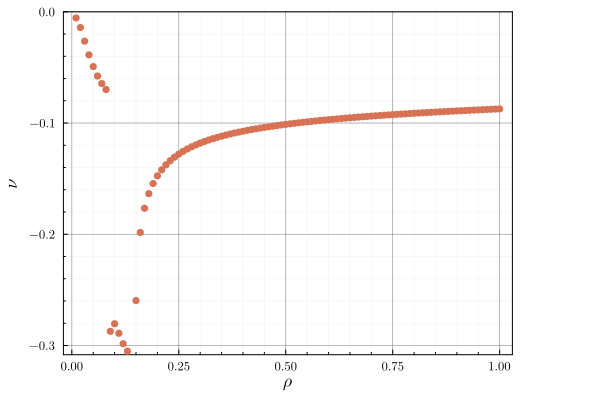

In [116]:
scatter(ρs,hcat(somedat...)[6,:],
ylim=(:auto,0),
label=:none,
xlabel=L"\rho",
ylabel=L"\nu")


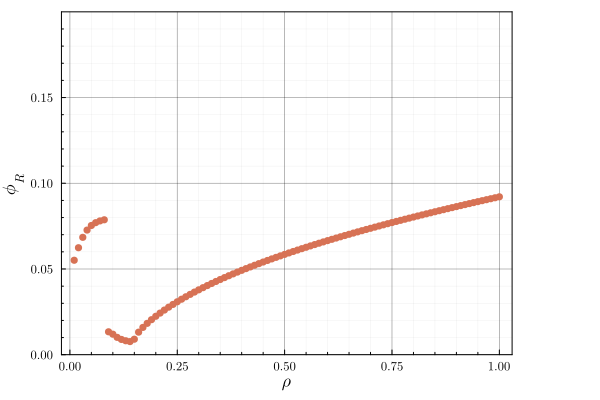

In [117]:
scatter(ρs,hcat(somedat...)[7,:],
ylim=(0,0.2),
label=:none,
xlabel=L"\rho",
ylabel=L"\phi_R")


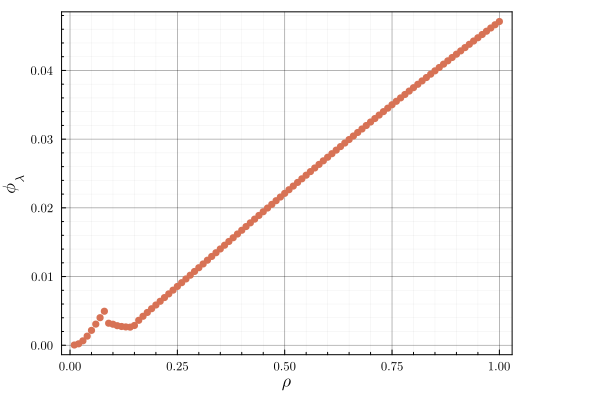

In [118]:
scatter(ρs,hcat(somedat...)[8,:],
# ylim=(0,1),
label=:none,
xlabel=L"\rho",
ylabel=L"\phi_\lambda")
